# Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [179]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [180]:
from imblearn.under_sampling import RandomUnderSampler as Rus

# 2.1 Import the data file into a dataframe named “customers“ with the column headings as contained in the data file.

In [181]:
customers = pd.read_csv("credit_card_customers.csv")
customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,R60K - R80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than R40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than R40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,R40K - R60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,R40K - R60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than R40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,R40K - R60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# 2.2 Inspect the data by:

In [182]:
print('Rows:',customers.shape[0])
print('Columns:',customers.shape[1])

Rows: 10127
Columns: 23


In [183]:
customers.tail(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,R60K - R80K,Blue,54,...,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139,0.992680,0.007320
10108,714471183,Attrited Customer,47,M,4,Graduate,Divorced,R80K - R120K,Blue,39,...,17504.0,476,17028.0,0.892,10468,66,0.737,0.027,0.998160,0.001844
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than R40K,Blue,35,...,4165.0,0,4165.0,0.813,17093,111,0.820,0.000,0.000896,0.999100
10110,718225683,Existing Customer,56,M,1,Graduate,Single,R80K - R120K,Silver,49,...,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032,0.000097,0.999900
10111,710734308,Existing Customer,49,M,1,Graduate,Single,R60K - R80K,Blue,40,...,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242,0.000284,0.999720
10112,708564858,Attrited Customer,33,M,2,College,Married,R120K +,Gold,20,...,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,0.994380,0.005620
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,R60K - R80K,Blue,36,...,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189,0.993380,0.006620
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than R40K,Blue,15,...,4700.0,0,4700.0,0.617,14723,96,0.655,0.000,0.000235,0.999770
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,R40K - R60K,Blue,36,...,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276,0.000174,0.999830
10116,714109308,Existing Customer,46,M,5,College,Single,R80K - R120K,Blue,36,...,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.999810


In [184]:
customers.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [185]:
customers.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

# 2.3 Discard the first, as well as last 7 columns

In [186]:
customers.drop(columns=customers.columns[0], inplace=True, axis=1)
customers.drop(customers.iloc[:,15:22], inplace = True, axis=1)

In [187]:
customers

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,Existing Customer,45,M,3,High School,Married,R60K - R80K,Blue,39,5,1,3,12691.0,777,11914.0
1,Existing Customer,49,F,5,Graduate,Single,Less than R40K,Blue,44,6,1,2,8256.0,864,7392.0
2,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,Blue,36,4,1,0,3418.0,0,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than R40K,Blue,34,3,4,1,3313.0,2517,796.0
4,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,Blue,21,5,1,0,4716.0,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,R40K - R60K,Blue,40,3,2,3,4003.0,1851,2152.0
10123,Attrited Customer,41,M,2,Unknown,Divorced,R40K - R60K,Blue,25,4,2,3,4277.0,2186,2091.0
10124,Attrited Customer,44,F,1,High School,Married,Less than R40K,Blue,36,5,3,4,5409.0,0,5409.0
10125,Attrited Customer,30,M,2,Graduate,Unknown,R40K - R60K,Blue,36,4,3,3,5281.0,0,5281.0


# 2.4 According to your analysis of the dataset, what does the feature Avg_Open_To_Buy refer to?

In [188]:
print("According to the dataset, it is the Credit_limit - Total_Revolving_Bal")

According to the dataset, it is the Credit_limit - Total_Revolving_Bal


# 2.5 Generate a statistical summary of all the features.

In [189]:
customers.describe(include = "all")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than R40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000


In [190]:
print("2.5.1","There are 7 unique education levels")

2.5.1 There are 7 unique education levels


# 2.6 Determine and display the percentage of customers who receive an income of R120 000 (R120K) or more

In [191]:
customers["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [192]:
Unedu_cus= len(customers[(customers["Income_Category"]== "R120K +") & (customers["Education_Level"]== "Uneducated")])/len(customers[(customers["Income_Category"]== "R120K +")])
PhDedu_cus= len(customers[(customers["Income_Category"]== "R120K +") & (customers["Education_Level"]== "Doctorate")])/len(customers[(customers["Income_Category"]== "R120K +")])

print("Uneducated customers: ", round(Unedu_cus,2), "%")
print("PhD customers: ", round(PhDedu_cus,2), "%")

Uneducated customers:  0.16 %
PhD customers:  0.05 %


In [193]:
print("Education level is not directly linked to the income category a person will \nfall into")

Education level is not directly linked to the income category a person will 
fall into


# 2.7 Visualise the data

<AxesSubplot:xlabel='Education_Level', ylabel='Card_Category'>

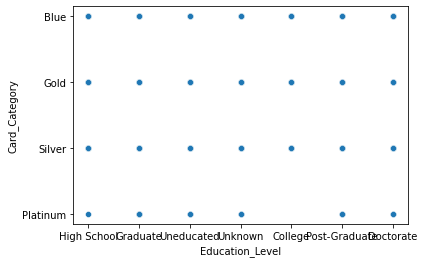

In [194]:
sns.scatterplot(x= customers["Education_Level"], y= customers["Card_Category"])

In [195]:
print("Only people with college education levels do not have platinum cards otherwise, every other education seems to contain a person in every category.")

Only people with college education levels do not have platinum cards otherwise, every other education seems to contain a person in every category.


<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

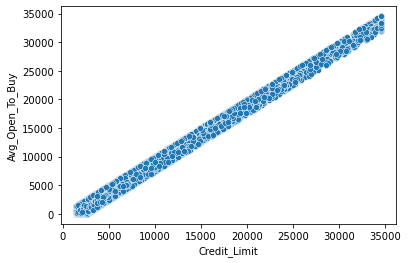

In [196]:
sns.scatterplot(x= customers["Credit_Limit"], y= customers["Avg_Open_To_Buy"])

In [197]:
print("Credit limit is directly proportional with avg_open_to_buy")

Credit limit is directly proportional with avg_open_to_buy


<AxesSubplot:xlabel='Income_Category', ylabel='Card_Category'>

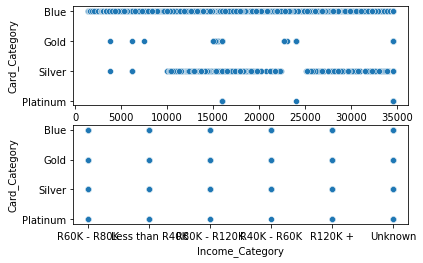

In [198]:
f, axes = plt.subplots(nrows = 2, ncols = 1)
sns.scatterplot(x= customers["Credit_Limit"], y= customers["Card_Category"],ax = axes[0])
sns.scatterplot(x= customers["Income_Category"], y= customers["Card_Category"],ax = axes[1])

# 2.8 The Attrition_Flag column 

In [199]:
customers["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# 2.9 Determine whether the data is balanced

([<matplotlib.patches.Wedge at 0x231cddfd340>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.1%')])

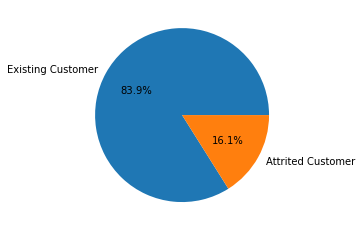

In [200]:
plt.pie(customers["Attrition_Flag"].value_counts(),autopct='%1.1f%%', labels =customers["Attrition_Flag"].unique())

# 2.10 Perform the necessary operations to balance the data:

In [201]:
y = customers["Attrition_Flag"]
X = customers.drop("Attrition_Flag", axis = 1) 

undersample = Rus(sampling_strategy='majority')
X_un, y_un = undersample.fit_resample(X, y)



In [202]:
customers_resampled = pd.concat([X_un, y_un], axis =1)
customers_resampled

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Attrition_Flag
0,62,F,0,Graduate,Married,Less than R40K,Blue,49,2,3,3,1438.3,0,1438.3,Attrited Customer
1,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,Attrited Customer
2,54,F,1,Graduate,Married,Less than R40K,Blue,40,2,3,1,1438.3,808,630.3,Attrited Customer
3,56,M,2,Graduate,Married,R120K +,Blue,36,1,3,3,15769.0,0,15769.0,Attrited Customer
4,48,M,2,Graduate,Married,R60K - R80K,Silver,35,2,4,4,34516.0,0,34516.0,Attrited Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,29,M,1,Graduate,Married,R80K - R120K,Blue,14,5,3,2,14853.0,0,14853.0,Existing Customer
3250,26,M,0,College,Single,R40K - R60K,Blue,13,5,2,2,2047.0,1196,851.0,Existing Customer
3251,55,M,2,Unknown,Single,R80K - R120K,Blue,36,5,2,2,10604.0,1988,8616.0,Existing Customer
3252,43,F,3,Graduate,Single,R40K - R60K,Blue,33,3,2,2,2900.0,2122,778.0,Existing Customer


# 2.11 Confirm the successful resampling

In [203]:
customers_resampled["Attrition_Flag"].value_counts()

Attrited Customer    1627
Existing Customer    1627
Name: Attrition_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x231ce2ddd90>,
 [Text(6.735557395310444e-17, 1.1, 'Attrited Customer'),
  Text(-2.0206672185931328e-16, -1.1, 'Existing Customer')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

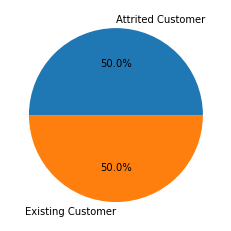

In [204]:
plt.pie(customers_resampled["Attrition_Flag"].value_counts(),autopct='%1.1f%%', labels =customers_resampled["Attrition_Flag"].unique())

# 2.12 Convert the text values

In [205]:
customers_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              3254 non-null   int64  
 1   Gender                    3254 non-null   object 
 2   Dependent_count           3254 non-null   int64  
 3   Education_Level           3254 non-null   object 
 4   Marital_Status            3254 non-null   object 
 5   Income_Category           3254 non-null   object 
 6   Card_Category             3254 non-null   object 
 7   Months_on_book            3254 non-null   int64  
 8   Total_Relationship_Count  3254 non-null   int64  
 9   Months_Inactive_12_mon    3254 non-null   int64  
 10  Contacts_Count_12_mon     3254 non-null   int64  
 11  Credit_Limit              3254 non-null   float64
 12  Total_Revolving_Bal       3254 non-null   int64  
 13  Avg_Open_To_Buy           3254 non-null   float64
 14  Attritio

In [206]:
customers_resampled.nunique()

Customer_Age                  43
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                2482
Total_Revolving_Bal         1233
Avg_Open_To_Buy             2679
Attrition_Flag                 2
dtype: int64

In [207]:
label_encoder = LabelEncoder()

customers_resampled['Attrition_Flag'] = label_encoder.fit_transform(customers_resampled['Attrition_Flag'])
customers_resampled['Gender'] = label_encoder.fit_transform(customers_resampled['Gender'])

customers_resampled.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Attrition_Flag
0,62,0,0,Graduate,Married,Less than R40K,Blue,49,2,3,3,1438.3,0,1438.3,0
1,66,0,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,0
2,54,0,1,Graduate,Married,Less than R40K,Blue,40,2,3,1,1438.3,808,630.3,0
3,56,1,2,Graduate,Married,R120K +,Blue,36,1,3,3,15769.0,0,15769.0,0
4,48,1,2,Graduate,Married,R60K - R80K,Silver,35,2,4,4,34516.0,0,34516.0,0
5,55,0,4,Unknown,Married,R40K - R60K,Blue,45,2,4,3,2158.0,0,2158.0,0
6,47,1,2,Unknown,Married,R80K - R120K,Blue,37,2,3,3,5449.0,1628,3821.0,0
7,53,1,2,Graduate,Married,R80K - R120K,Blue,41,3,3,2,11669.0,2227,9442.0,0
8,48,0,5,High School,Married,Less than R40K,Blue,38,1,3,3,8025.0,0,8025.0,0
9,59,1,1,College,Single,R60K - R80K,Blue,53,2,3,3,14979.0,0,14979.0,0


In [208]:
customers_resampled = pd.concat([customers_resampled, pd.get_dummies(customers_resampled['Education_Level']),  pd.get_dummies(customers_resampled['Income_Category']), pd.get_dummies(customers_resampled['Card_Category']), pd.get_dummies(customers_resampled['Marital_Status'])], axis=1)
customers_resampled.drop(['Education_Level', 'Income_Category', 'Card_Category','Marital_Status'], axis=1, inplace=True)
customers_resampled.head(10)

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,R80K - R120K,Unknown,Blue,Gold,Platinum,Silver,Divorced,Married,Single,Unknown
0,62,0,0,49,2,3,3,1438.3,0,1438.3,...,0,0,1,0,0,0,0,1,0,0
1,66,0,0,56,5,4,3,7882.0,605,7277.0,...,0,1,1,0,0,0,0,1,0,0
2,54,0,1,40,2,3,1,1438.3,808,630.3,...,0,0,1,0,0,0,0,1,0,0
3,56,1,2,36,1,3,3,15769.0,0,15769.0,...,0,0,1,0,0,0,0,1,0,0
4,48,1,2,35,2,4,4,34516.0,0,34516.0,...,0,0,0,0,0,1,0,1,0,0
5,55,0,4,45,2,4,3,2158.0,0,2158.0,...,0,0,1,0,0,0,0,1,0,0
6,47,1,2,37,2,3,3,5449.0,1628,3821.0,...,1,0,1,0,0,0,0,1,0,0
7,53,1,2,41,3,3,2,11669.0,2227,9442.0,...,1,0,1,0,0,0,0,1,0,0
8,48,0,5,38,1,3,3,8025.0,0,8025.0,...,0,0,1,0,0,0,0,1,0,0
9,59,1,1,53,2,3,3,14979.0,0,14979.0,...,0,0,1,0,0,0,0,0,1,0


# 2.13 Define X and y and create a training / testing dataset of 80% / 20%:

In [209]:
y = customers_resampled["Attrition_Flag"]
X = customers_resampled.drop("Attrition_Flag", axis = 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

print("X_Train: ",X_train.shape)
print("X_test: ",X_train.shape)

X_Train:  (2603, 31)
X_test:  (2603, 31)


In [210]:
X_train.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,R80K - R120K,Unknown,Blue,Gold,Platinum,Silver,Divorced,Married,Single,Unknown
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.00000,2603.000000,2603.000000,2603.000000,2603.000000,...,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,46.553592,0.466385,2.368805,36.046101,3.611218,2.48252,2.663465,8671.471994,972.424894,7699.047100,...,0.147138,0.106800,0.923934,0.013446,0.001921,0.060699,0.071072,0.461391,0.397234,0.070303
std,7.774425,0.498965,1.289398,7.771043,1.590536,0.97784,1.123639,9329.177974,892.391571,9331.571402,...,0.354311,0.308918,0.265155,0.115197,0.043794,0.238824,0.256994,0.498603,0.489419,0.255707
min,26.000000,0.000000,0.000000,13.000000,1.000000,0.00000,0.000000,1438.300000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,32.000000,2.000000,2.00000,2.000000,2474.000000,0.000000,1438.300000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,2.000000,36.000000,3.000000,3.00000,3.000000,4395.000000,951.000000,3549.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,3.000000,40.000000,5.000000,3.00000,3.000000,10897.000000,1706.500000,9939.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,70.000000,1.000000,5.000000,56.000000,6.000000,6.00000,6.000000,34516.000000,2517.000000,34516.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
X_test.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,R80K - R120K,Unknown,Blue,Gold,Platinum,Silver,Divorced,Married,Single,Unknown
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,46.221198,0.440860,2.367127,35.864823,3.632873,2.511521,2.775730,8105.745929,953.758833,7151.987097,...,0.152074,0.107527,0.938556,0.013825,0.003072,0.044547,0.079877,0.410138,0.423963,0.086022
std,8.167115,0.496872,1.312224,7.724497,1.584180,0.953265,1.141697,9014.312150,905.033240,9017.417493,...,0.359368,0.310020,0.240327,0.116853,0.055385,0.206465,0.271311,0.492237,0.494565,0.280611
min,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,32.000000,2.000000,2.000000,2.000000,2321.500000,0.000000,1438.300000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,2.000000,36.000000,4.000000,3.000000,3.000000,4152.000000,926.000000,3280.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9666.000000,1703.000000,8457.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,65.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
X_train= stats.zscore(X_train)
X_test= stats.zscore(X_test)

In [213]:
X_train.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,R80K - R120K,Unknown,Blue,Gold,Platinum,Silver,Divorced,Married,Single,Unknown
count,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,...,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03,2.603000e+03
mean,-1.832316e-16,4.370090e-16,6.013886e-18,-1.823785e-16,-9.954900e-17,-2.612841e-16,-2.892423e-16,-5.689733e-17,1.789664e-16,-1.182731e-16,...,-1.597305e-16,2.524552e-16,-1.013404e-16,1.855881e-16,3.364790e-16,-3.340479e-16,1.950674e-16,-1.104678e-16,5.365580e-17,-2.320251e-16
std,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,...,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00
min,-2.644252e+00,-9.348851e-01,-1.837494e+00,-2.966208e+00,-1.642037e+00,-2.539269e+00,-2.370847e+00,-7.754769e-01,-1.089893e+00,-8.237116e-01,...,-4.153583e-01,-3.457888e-01,-3.485178e+00,-1.167445e-01,-4.386978e-02,-2.542079e-01,-2.766035e-01,-9.255449e-01,-8.117995e-01,-2.749906e-01
25%,-7.144784e-01,-9.348851e-01,-1.061789e+00,-5.207638e-01,-1.013198e+00,-4.935502e-01,-5.905744e-01,-6.644383e-01,-1.089893e+00,-6.710499e-01,...,-4.153583e-01,-3.457888e-01,2.869294e-01,-1.167445e-01,-4.386978e-02,-2.542079e-01,-2.766035e-01,-9.255449e-01,-8.117995e-01,-2.749906e-01
50%,5.743110e-02,-9.348851e-01,-2.860840e-01,-5.933503e-03,-3.843580e-01,5.293090e-01,2.995618e-01,-4.584856e-01,-2.401301e-02,-4.448173e-01,...,-4.153583e-01,-3.457888e-01,2.869294e-01,-1.167445e-01,-4.386978e-02,-2.542079e-01,-2.766035e-01,-9.255449e-01,-8.117995e-01,-2.749906e-01
75%,7.006890e-01,1.069650e+00,4.896208e-01,5.088968e-01,8.733213e-01,5.293090e-01,2.995618e-01,2.386015e-01,8.227511e-01,2.401400e-01,...,-4.153583e-01,-3.457888e-01,2.869294e-01,-1.167445e-01,-4.386978e-02,-2.542079e-01,-2.766035e-01,1.080445e+00,1.231831e+00,-2.749906e-01
max,3.016418e+00,1.069650e+00,2.041030e+00,2.568218e+00,1.502161e+00,3.597887e+00,2.969970e+00,2.770822e+00,1.731159e+00,2.874340e+00,...,2.407560e+00,2.891939e+00,2.869294e-01,8.565712e+00,2.279474e+01,3.933787e+00,3.615283e+00,1.080445e+00,1.231831e+00,3.636488e+00


In [214]:
X_test.describe()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,R80K - R120K,Unknown,Blue,Gold,Platinum,Silver,Divorced,Married,Single,Unknown
count,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,...,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02
mean,-1.250919e-16,-1.337043e-16,9.141007e-17,1.362144e-16,-2.349205e-17,-5.798400e-18,-4.323219e-17,5.354993e-17,3.581365e-17,1.207431e-16,...,-2.107889e-16,1.768512e-16,6.821647e-17,4.294653e-16,-1.540200e-16,-1.535723e-16,-1.204021e-16,-3.001525e-16,9.550306e-17,-3.554078e-16
std,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,...,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00
min,-2.477833e+00,-8.879536e-01,-1.805291e+00,-2.962317e+00,-1.663256e+00,-2.636678e+00,-2.433101e+00,-7.402198e-01,-1.054649e+00,-7.934072e-01,...,-4.234948e-01,-3.471051e-01,-3.908324e+00,-1.184006e-01,-5.551274e-02,-2.159254e-01,-2.946377e-01,-8.338540e-01,-8.579044e-01,-3.067860e-01
25%,-6.397869e-01,-8.879536e-01,-1.042641e+00,-5.007181e-01,-1.031529e+00,-5.370116e-01,-6.799757e-01,-6.421670e-01,-1.054649e+00,-6.341151e-01,...,-4.234948e-01,-3.471051e-01,2.558641e-01,-1.184006e-01,-5.551274e-02,-2.159254e-01,-2.946377e-01,-8.338540e-01,-8.579044e-01,-3.067860e-01
50%,-2.710483e-02,-8.879536e-01,-2.799900e-01,1.751319e-02,2.319243e-01,5.128219e-01,1.965870e-01,-4.389449e-01,-3.069520e-02,-4.297200e-01,...,-4.234948e-01,-3.471051e-01,2.558641e-01,-1.184006e-01,-5.551274e-02,-2.159254e-01,-2.946377e-01,-8.338540e-01,-8.579044e-01,-3.067860e-01
75%,7.081136e-01,1.126185e+00,4.826607e-01,5.357444e-01,8.636512e-01,5.128219e-01,1.965870e-01,1.732194e-01,8.284970e-01,1.448326e-01,...,-4.234948e-01,-3.471051e-01,2.558641e-01,-1.184006e-01,-5.551274e-02,-2.159254e-01,-2.946377e-01,1.199251e+00,1.165631e+00,-3.067860e-01
max,2.301087e+00,1.126185e+00,2.007962e+00,2.608669e+00,1.495378e+00,3.662322e+00,2.826275e+00,2.932066e+00,1.728603e+00,3.036907e+00,...,2.361304e+00,2.880972e+00,2.558641e-01,8.445906e+00,1.801388e+01,4.631228e+00,3.393999e+00,1.199251e+00,1.165631e+00,3.259601e+00


In [215]:
X_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
College                     0
Doctorate                   0
Graduate                    0
High School                 0
Post-Graduate               0
Uneducated                  0
Unknown                     0
Less than R40K              0
R120K +                     0
R40K - R60K                 0
R60K - R80K                 0
R80K - R120K                0
Unknown                     0
Blue                        0
Gold                        0
Platinum                    0
Silver                      0
Divorced                    0
Married                     0
Single                      0
Unknown                     0
dtype: int64

In [216]:
X_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
College                     0
Doctorate                   0
Graduate                    0
High School                 0
Post-Graduate               0
Uneducated                  0
Unknown                     0
Less than R40K              0
R120K +                     0
R40K - R60K                 0
R60K - R80K                 0
R80K - R120K                0
Unknown                     0
Blue                        0
Gold                        0
Platinum                    0
Silver                      0
Divorced                    0
Married                     0
Single                      0
Unknown                     0
dtype: int64

# 2.14 Train the following classifiers and determine the best model

In [227]:

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models

results = []
names = []
error = []
for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 77, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    error.append(1- cv_results)
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR(acc): 0.711865 (0.020643)
LR(f1): 0.723080 (0.015779)
KNN(acc): 0.613911 (0.015869)
KNN(f1): 0.619359 (0.024310)
SVM(acc): 0.718786 (0.021604)
SVM(f1): 0.730613 (0.018117)


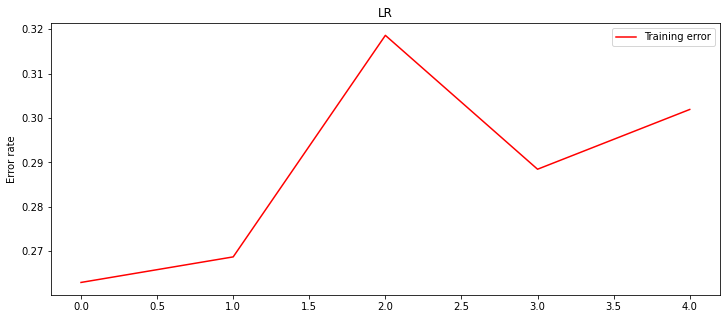

In [238]:
p1, = plt.plot(error[0],'r')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.title("LR")
plt.ylabel('Error rate')
plt.legend([p1], ["Training error"])

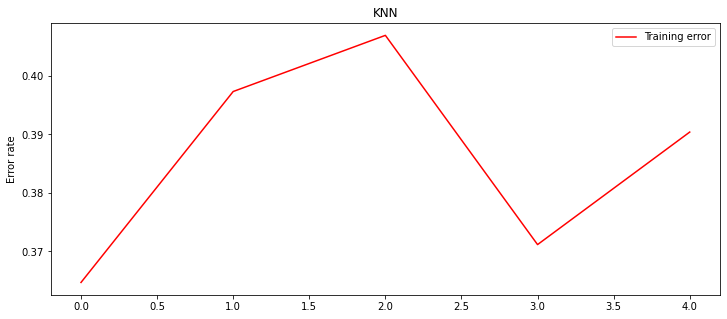

In [240]:
p1, = plt.plot(error[1],'r')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.title("KNN")
plt.ylabel('Error rate')
plt.legend([p1], ["Training error"])

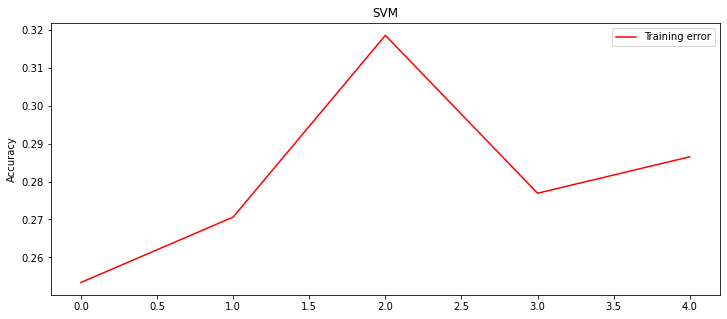

In [242]:
p1, = plt.plot(error[2],'r')
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.title("SVM")
plt.ylabel('Accuracy')
plt.legend([p1], ["Training error"])

# 2.15 Select the model that produced the highest F1 score to do the following:

In [163]:
model = SVC(gamma = 'auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [164]:
print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7419354838709677
[[249 104]
 [ 64 234]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       353
           1       0.69      0.79      0.74       298

    accuracy                           0.74       651
   macro avg       0.74      0.75      0.74       651
weighted avg       0.75      0.74      0.74       651



# 2.16 Discuss the selected model’s metrics

In [166]:
print("It has a higher testing accuracy than training accuracy but \nboth a similarly high so the model is a great fit.")

It has a higher testing accuracy than training accuracy but 
both a similarly high so the model is a great fit.


In [171]:
print("Recall is the ratio of true postives to overall truly positive datapoints\ni.e how many true postives did our model capture\n")
print("Precision is the ratio of true postives to overall positive classifcations\n")
print("F1 score is the weighted average of precision and recall")

Recall is the ratio of true postives to overall truly positive datapoints
i.e how many true postives did our model capture

Precision is the ratio of true postives to overall positive classifcations

F1 score is the weighted average of precision and recall
